# Movie Genre Classification

Movies are a popular means of entertainment all around the world. With a lot of streaming services and websites available and with more on the horizon, building a predictive model that automatically generates the genre of a movie based on the its plot summary is definitely beneficial as it may reduce the expense of manually tagging the movies.

# Data Understanding

## Preprocessing and Exploratory Data Analysis

#### IMPORT NEEDED PACKAGES


In [1]:
import pandas as pd
from google.colab import drive
import re
import numpy as np
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import chardet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import TFBertModel, BertTokenizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import gensim.downloader as api
from google.colab import files



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Data Information

In [5]:
# Loading the dataset

file_path = 'train.csv'

data = pd.read_csv(file_path, sep=',', engine='python', header=None)

data.columns = ['title', 'date_x', 'score', 'GENRE','DESCRIPTION','crew','og_title','status','lang','budget','revenue',
                'country']

In [6]:
df=data

In [7]:
# Remove the first row
data = data.drop(0)
data = data.drop(columns=[col for col in data.columns if col not in ['title', 'DESCRIPTION', 'GENRE']])

# Reset the index if needed
data = data.reset_index(drop=True)

In [16]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 10178
Number of attributes = 3


,title,GENRE,DESCRIPTION
0,Creed III,"Drama, Action","After dominating the boxing world, Adonis Cree..."
1,Avatar: The Way of Water,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...
2,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,..."
3,Mummies,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ..."
4,Supercell,Action,Good-hearted teenager William always lived in ...


#### Data Types

In [17]:
# Printing data types of DataFrame
data.dtypes

title          object
GENRE          object
DESCRIPTION    object
dtype: object

In [18]:
data.columns

Index(['title', 'GENRE', 'DESCRIPTION'], dtype='object')

In [19]:
data.head(5)

,title,GENRE,DESCRIPTION
0,Creed III,"Drama, Action","After dominating the boxing world, Adonis Cree..."
1,Avatar: The Way of Water,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...
2,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,..."
3,Mummies,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ..."
4,Supercell,Action,Good-hearted teenager William always lived in ...


#### Dataframe Statistics

In [20]:
# Printing description of DataFrame
data.describe().T

,count,unique,top,freq
title,10178,9660,Pinocchio,12
GENRE,10093,2303,Drama,556
DESCRIPTION,10178,9905,We don't have an overview translated in Englis...,89


### Extract unique values of GENRE feature


In [ ]:
# Convert values in 'GENRE' column to lowercase and remove leading/trailing whitespaces
data['GENRE'] = data['GENRE'].str.lower().str.strip()

In [ ]:

data = data.dropna(subset=['GENRE'])

# Split the genres for each movie and create a list of all genres
all_genres = [genre.strip() for sublist in data['GENRE'].str.split(',') for genre in sublist if genre]

# Extract unique genre values
unique_genres = set(all_genres)

# Count the unique genre values
num_unique_genres = len(unique_genres)

# Print unique genre values and count
print("Unique Genres:")
for genre in unique_genres:
    print(genre)
print("Number of unique genres:", num_unique_genres)

### Print them with their frequency

In [22]:
# Convert values in 'GENRE' column to lowercase and remove leading/trailing whitespaces
data['GENRE'] = data['GENRE'].str.lower().str.strip()

In [23]:

data = data.dropna(subset=['GENRE'])

# Split the genres for each movie and create a list of all genres
all_genres = [genre.strip() for sublist in data['GENRE'].str.split(',') for genre in sublist if genre]

# Extract unique genre values
unique_genres = set(all_genres)

# Count the unique genre values
num_unique_genres = len(unique_genres)

# Print unique genre values and count
print("Unique Genres:")
for genre in unique_genres:
    print(genre)
print("Number of unique genres:", num_unique_genres)

Unique Genres:
comedy
horror
war
science fiction
tv movie
adventure
history
thriller
drama
documentary
music
fantasy
romance
animation
family
crime
mystery
western
action
Number of unique genres: 19


In [24]:
df =data

### Plot them with their distribution

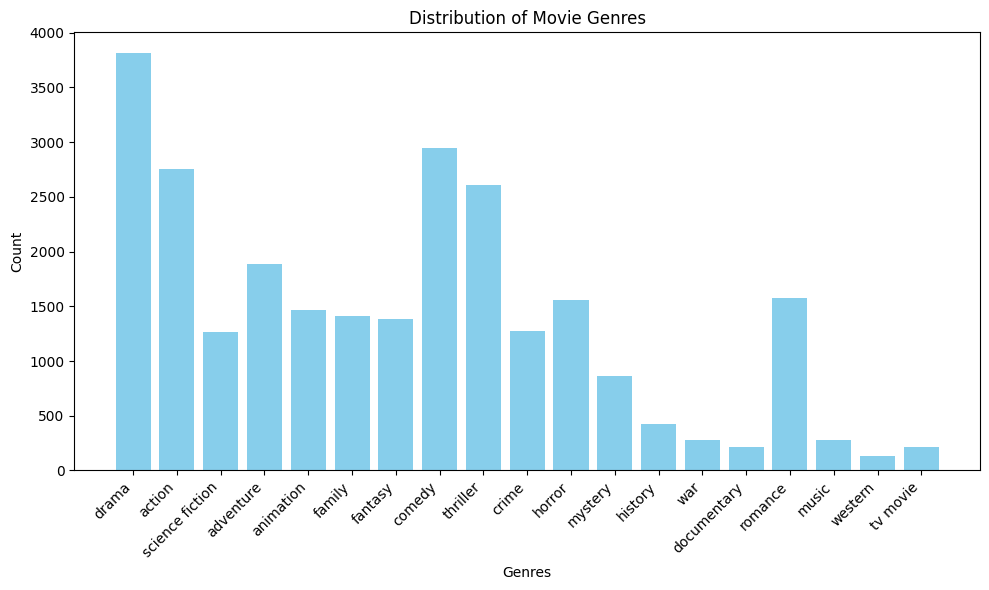

In [25]:
# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Extract unique genre values
unique_genres = list(genre_counts.keys())

# Extract counts for each genre
genre_values = list(genre_counts.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique_genres, genre_values, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Handling missing values

In [26]:
columns_to_check = ['GENRE']
df.dropna(subset=columns_to_check, inplace=True)

In [27]:
# Assuming 'df' is your DataFrame
missing_values_count = df.isnull().sum()
print(missing_values_count)

title          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [28]:
# Drop duplicate rows based on the 'title' column
data = data.drop_duplicates(subset=['title'])
# Drop duplicate rows based on the 'title' column
df = df.drop_duplicates(subset=['title'])

#           Data Cleaning and Standardization

 ### Removing HTML tags if the data is scraped from the web

In [29]:
pip install beautifulsoup4


In [30]:
from bs4 import BeautifulSoup
# Function to remove HTML tags using BeautifulSoup
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the function to the DESCRIPTION column
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_html_tags)


<ipython-input-30-7393778d96c3>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


 ### Removing special characters

In [31]:
def remove_special_characters(text):
    # This pattern will keep only letters, numbers, and spaces
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_special_characters)

 ### Removing emojis and  non-standard symbols

In [32]:
# Function to remove emojis and other non-standard symbols
def remove_emojis_and_symbols(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_emojis_and_symbols)


###   Converting to Lowercase:

In [33]:
 # Convert DESCRIPTION column to lowercase
data['DESCRIPTION'] = data['DESCRIPTION'].str.lower()


# Print the first few rows to verify the changes
print(data[['DESCRIPTION']].head())

print(data)

                                         DESCRIPTION
0  after dominating the boxing world adonis creed...
1  set more than a decade after the events of the...
2  while working underground to fix a water main ...
3  through a series of unfortunate events three m...
4  goodhearted teenager william always lived in h...
                                         title  \
0                                    Creed III   
1                     Avatar: The Way of Water   
2                  The Super Mario Bros. Movie   
3                                      Mummies   
4                                    Supercell   
...                                        ...   
10173                       20th Century Women   
10174  Delta Force 2: The Colombian Connection   
10175                         The Russia House   
10176         Darkman II: The Return of Durant   
10177       The Swan Princess: A Royal Wedding   

                                                   GENRE  \
0                    

### Fixing Encoding Issues

In [34]:
# Open the file in binary mode and read a sample of the data to detect encoding
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read(10000))  # Adjust the number of bytes read as needed

# Use the detected encoding to read the CSV file
df = pd.read_csv(file_path, encoding=result['encoding'])
print(f"Loaded with detected encoding: {result['encoding']}")


Loaded with detected encoding: utf-8


In [35]:
df = data

In [36]:
df.head()


,title,GENRE,DESCRIPTION
0,Creed III,"drama, action",after dominating the boxing world adonis creed...
1,Avatar: The Way of Water,"science fiction, adventure, action",set more than a decade after the events of the...
2,The Super Mario Bros. Movie,"animation, adventure, family, fantasy, comedy",while working underground to fix a water main ...
3,Mummies,"animation, comedy, family, adventure, fantasy",through a series of unfortunate events three m...
4,Supercell,action,goodhearted teenager william always lived in h...


###  Remove Extra Whitespace

In [37]:
# Assuming 'df' is your DataFrame
string_columns = df.select_dtypes(include=['object']).columns

# Removing extra whitespace
for col in string_columns:
    df[col] = df[col].str.strip()  # Strip leading and trailing whitespace
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # Replace multiple internal spaces

# Verify the changes
print(df.head())


                         title                                          GENRE  \
0                    Creed III                                  drama, action   
1     Avatar: The Way of Water             science fiction, adventure, action   
2  The Super Mario Bros. Movie  animation, adventure, family, fantasy, comedy   
3                      Mummies  animation, comedy, family, adventure, fantasy   
4                    Supercell                                         action   

                                         DESCRIPTION  
0  after dominating the boxing world adonis creed...  
1  set more than a decade after the events of the...  
2  while working underground to fix a water main ...  
3  through a series of unfortunate events three m...  
4  goodhearted teenager william always lived in h...  


### Checking Missing Values

In [38]:
# Handle missing values
data.dropna(inplace=True)

# Check for missing values
assert not data.isnull().values.any(), "Missing values are present in the data."

# Print success message
print("Missing values handled successfully.")

Missing values handled successfully.


### Normalization

### Non-informative words

In [43]:
# Download the set of stop words the first time
nltk.download('stopwords')

# Load the stop words
non_informative_words = set(stopwords.words('english'))

# Assuming you have loaded your DataFrame already; if not, load it here
# df = pd.read_csv('path_to_your_file.csv')

# Define the function to remove non-informative words
def remove_non_informative(text):
    # Split the text into words and remove non-informative words
    return ' '.join(word for word in text.split() if word.lower() not in non_informative_words)

# Apply the function to remove non-informative words from the 'DESCRIPTION' column
df['CLEAN_DESCRIPTION'] = df['DESCRIPTION'].apply(remove_non_informative)

# Optionally, check again for non-informative words in 'CLEAN_DESCRIPTION'
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].apply(
    lambda x: any(word.lower() in non_informative_words for word in x.split())
)

# Display the DataFrame to verify the removal and create a summary
display_df = df[['CLEAN_DESCRIPTION', 'contains_non_informative']]
summary = {'Non-informative Words Removed': not df['contains_non_informative'].any()}

print(display_df.head())  # Display first few rows to check
print(summary)  # Display summary of checks


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   CLEAN_DESCRIPTION  contains_non_informative
0  dominating boxing world adonis creed thriving ...                     False
1  set decade events first film learn story sully...                     False
2  working underground fix water main brooklyn pl...                     False
3  series unfortunate events three mummies end pr...                     False
4  goodhearted teenager william always lived hope...                     False
{'Non-informative Words Removed': True}


In [44]:
# Download the set of stop words the first time
nltk.download('stopwords')

# Load the stop words
non_informative_words = set(stopwords.words('english'))

# Assuming you have loaded your DataFrame already; if not, load it here
# df = pd.read_csv('path_to_your_file.csv')

# Define the function to remove non-informative words
def remove_non_informative(text):
    # Split the text into words and remove non-informative words
    return ' '.join(word for word in text.split() if word.lower() not in non_informative_words)

# Apply the function to remove non-informative words from the 'DESCRIPTION' column
df['CLEAN_DESCRIPTION'] = df['DESCRIPTION'].apply(remove_non_informative)

# Optionally, check again for non-informative words in 'CLEAN_DESCRIPTION'
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].apply(
    lambda x: any(word.lower() in non_informative_words for word in x.split())
)

# Display the DataFrame to verify the removal and create a summary
display_df = df[['CLEAN_DESCRIPTION', 'contains_non_informative']]
summary = {'Non-informative Words Removed': not df['contains_non_informative'].any()}

print(display_df.head())  # Display first few rows to check
print(summary)  # Display summary of checks


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   CLEAN_DESCRIPTION  contains_non_informative
0  dominating boxing world adonis creed thriving ...                     False
1  set decade events first film learn story sully...                     False
2  working underground fix water main brooklyn pl...                     False
3  series unfortunate events three mummies end pr...                     False
4  goodhearted teenager william always lived hope...                     False
{'Non-informative Words Removed': True}


### checking cleanliness

In [45]:
# Define functions for cleaning
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_emojis_and_symbols(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)

# Apply cleaning functions
df['DESCRIPTION'] = df['DESCRIPTION'].apply(remove_html_tags).apply(remove_special_characters).apply(remove_emojis_and_symbols)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Download and prepare stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove non-informative words
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word.lower() not in stop_words)

df['CLEAN_DESCRIPTION'] = df['DESCRIPTION'].apply(remove_stop_words)

# Filling missing values appropriately
#df.fillna({'year': 0, 'rating': df['rating'].mean(), 'votes': 0, 'gross(in $)': 0}, inplace=True)
#df.fillna('unknown', inplace=True)

# Apply scaling
scaler = MinMaxScaler()
#df['rating'] = scaler.fit_transform(df[['rating']])
standard_scaler = StandardScaler()
#df[['votes', 'gross(in $)']] = standard_scaler.fit_transform(df[['votes', 'gross(in $)']])

# Removing extra whitespace
df = df.applymap(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)

# Verification steps
df['contains_html'] = df['DESCRIPTION'].apply(lambda x: bool(BeautifulSoup(x, "html.parser").find()))
df['contains_special'] = df['DESCRIPTION'].str.contains(r'[^a-zA-Z0-9\s]')
df['contains_stop'] = df['CLEAN_DESCRIPTION'].apply(lambda x: any(word in stop_words for word in x.split()))
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].str.contains(r'\b(' + '|'.join(stop_words) + r')\b')

summary = {
    'HTML Tags Removed': not df['contains_html'].any(),
    'Special Characters Removed': not df['contains_special'].any(),
    'Non-informative Words Removed': not df['contains_non_informative'].any(),
    'Stop Words Removed': not df['contains_stop'].any()
}

print(summary)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-45-8cb835bcbb5e>:55: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].str.contains(r'\b(' + '|'.join(stop_words) + r')\b')


{'HTML Tags Removed': True, 'Special Characters Removed': True, 'Non-informative Words Removed': True, 'Stop Words Removed': True}


### Handling numbers

In [46]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9ea70aef03ed14e4e7a78b3a0280775dcdd8aec7b33d93af05a1c730e39794b8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


### Tokenization, Stop Words Removal, and Handling Negations:

In [47]:
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Negation handling function
def handle_negation(tokens):
    negation_terms = ['not', 'no', 'never', "n't", 'nothing', 'nowhere', 'neither', 'nor']
    transformed_tokens = []
    negation_active = False

    for token in tokens:
        if token in negation_terms:
            negation_active = True
        elif negation_active:
            transformed_tokens.append(f"not_{token}")
            negation_active = False
        else:
            transformed_tokens.append(token)

    return transformed_tokens

# Apply tokenization
df['tokens'] = df['CLEAN_DESCRIPTION'].apply(tokenize_text)

# Apply negation handling
df['handled_negations'] = df['tokens'].apply(handle_negation)

# Display the DataFrame to verify negation handling
print(df[['tokens', 'handled_negations']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              tokens  \
0  [dominating, boxing, world, adonis, creed, thr...   
1  [set, decade, events, first, film, learn, stor...   
2  [working, underground, fix, water, main, brook...   
3  [series, unfortunate, events, three, mummies, ...   
4  [goodhearted, teenager, william, always, lived...   

                                   handled_negations  
0  [dominating, boxing, world, adonis, creed, thr...  
1  [set, decade, events, first, film, learn, stor...  
2  [working, underground, fix, water, main, brook...  
3  [series, unfortunate, events, three, mummies, ...  
4  [goodhearted, teenager, william, always, lived...  


### Lemmatization

In [48]:
!pip install spacy

In [49]:
# Load spaCy English model with only the tokenizer and tagger since that's enough for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Define the lemmatization function with nlp model as a parameter
def lemmatize_text(text, nlp):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Function to process in batches
def process_text_in_batches(dataframe, column_name):
    chunk_size = 500  # Adjust the chunk size based on your system's capability
    num_chunks = len(dataframe) // chunk_size + 1

    lemmatized_texts = []
    for i in tqdm(range(num_chunks)):
        batch = dataframe[column_name][i*chunk_size:(i+1)*chunk_size]
        lemmatized_batch = batch.apply(lambda text: lemmatize_text(text, nlp))
        lemmatized_texts.extend(lemmatized_batch)

    return lemmatized_texts

# Applying batch processing
df['lemmatized_description'] = process_text_in_batches(df, 'CLEAN_DESCRIPTION')

100%|██████████| 20/20 [01:43<00:00,  5.17s/it]


In [50]:
# Drop duplicate rows based on the 'title' column
data = data.drop_duplicates(subset=['title'])
# Drop duplicate rows based on the 'title' column
df = df.drop_duplicates(subset=['title'])

In [51]:
df.to_csv('lemmatized_data.csv', index=False)

In [ ]:
# Loading the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/lemmatized_dataset.csv'
data = pd.read_csv(file_path, sep=',', engine='python', header=None)

In [52]:
# Ensure the GloVe model is loaded (consider handling this with try-except to catch loading issues)
glove_model = api.load("glove-wiki-gigaword-50")

# Define the function to create document vectors
def document_vector(tokens, model):
    filtered_tokens = [token for token in tokens if token in model.key_to_index]
    if not filtered_tokens:
        return np.zeros(model.vector_size)
    return np.mean(model[filtered_tokens], axis=0)

# Apply the document vector function to a tokens column that should exist
# Ensure 'tokens' column exists and contains pre-tokenized data as lists of words
if 'tokens' in df.columns:
    df['vector'] = df['tokens'].apply(lambda tokens: document_vector(tokens, glove_model))
else:
    print("Error: 'tokens' column does not exist.")

# Check that the 'vector' column has been created successfully
if 'vector' not in df.columns:
    print("Vector column creation failed.")
else:
    print("Vector column created successfully.")


[==================================================] 100.0% 66.0/66.0MB downloaded
Vector column created successfully.


In [54]:
# Define a mapping of genres to aggregated genres
genre_aggregation = {
    'horror': 'Horror',
    'action': 'Action',
    'thriller': 'Thriller',
    'drama, romance': 'Romance',
    'action, crime, drama': 'Crime Drama',
    # Add other mappings
}

# Map genres to aggregated genres
df['aggregated_genre'] = df['GENRE'].replace(regex=genre_aggregation)

# Now, we reduce the genres to top N and 'other'
top_n = 10
top_genres = df['aggregated_genre'].value_counts().nlargest(top_n).index
df['final_genre'] = df['aggregated_genre'].apply(lambda x: x if x in top_genres else 'Other')

# Check the new distribution
print(df['final_genre'].value_counts(normalize=True))


final_genre
Other               0.767126
drama               0.055764
comedy              0.038116
Romance             0.026420
Horror              0.024227
comedy, romance     0.019215
Horror, Thriller    0.018170
documentary         0.014933
Action, Thriller    0.012218
comedy, drama       0.011905
romance             0.011905
Name: proportion, dtype: float64


In [56]:
# Perform PCA on vectors
pca = PCA(n_components=50)
reduced_vectors = pca.fit_transform(list(df['vector']))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_vectors, df['GENRE'], test_size=0.2, random_state=42)


In [57]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['final_genre'])
X_train, X_test, y_train, y_test = train_test_split(reduced_vectors, y_encoded, test_size=0.2, random_state=42)

# Train a simple Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7651356993736952


In [ ]:
# Model Hyperparameter Tuning

In [58]:
# Ensure the GloVe vectors are applied
if 'vector' in df.columns:
    # Prepare the features and labels
    X = np.stack(df['vector'].values)  # Convert list of vectors into a 2D array
    y = df['final_genre']

    # Encode the labels to be used in the model
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Train the XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Vector column not found. Ensure your vectorization step is correct.")


Accuracy: 0.7667014613778705


In [ ]:
# Advanced Model Architecture

In [ ]:
# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Calculate and print the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)


In [ ]:
# Feature Engineering

In [ ]:
### Feature Scaling: Standardize features by removing the mean and scaling to unit variance

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy with Scaled Features:", accuracy_score(y_test, y_pred))


In [ ]:
# Ensemble Techniques

In [ ]:
# Create sub-models
model1 = RandomForestClassifier(n_estimators=300, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)

# Create a voting classifier
ensemble = VotingClassifier(estimators=[
    ('rf', model1), ('gb', model2)],
    voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))


In [ ]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#NEURAL NETWORKS BERT MODEL USING HUGGING FACE

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

lemmatized_data = pd.read_csv('lemmatized_data.csv')
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.last_hidden_state  # Get token embeddings from model output
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)  # Avoid division by zero
    return sum_embeddings / sum_mask

# Extract movie descriptions from your DataFrame
descriptions = lemmatized_data['lemmatized_description'].tolist()

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('google-bert/bert-base-uncased')

# Tokenize descriptions
encoded_input = tokenizer(descriptions, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)
print("Accuracy:", accuracy)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
#TRANSLATION OF THE DATASET INTO ARABIC

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd

# Load your model and tokenizer
model_path = "mustafaaljadery/gemma-2B-10M"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype=torch.bfloat16
)

def translate(text, max_length=512, temperature=0.8):
    prompt_text = f"Translate this to Arabic: {text}"
    inputs = tokenizer(prompt_text, return_tensors="pt")
    input_ids = inputs["input_ids"].to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_length=max_length,
            temperature=temperature,
            num_beams=5,
            no_repeat_ngram_size=2,
            early_stopping=True
        )

    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

# Load your dataset
input_csv_path = 'train.csv'
output_csv_path = 'arabic.csv'

df = pd.read_csv(input_csv_path)

# Print the column names to verify
print(df.columns)

# Assuming the column to translate is named 'text'
# Replace 'text' with the actual column name if different
df['translated_description'] = df['DESCRIPTION'].apply(translate)

# Save the translated dataset to a new CSV file
df.to_csv(output_csv_path, index=False)

print("Translation complete. Translated dataset saved to:", output_csv_path)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at mustafaaljadery/gemma-2B-10M were not used when initializing GemmaForCausalLM: ['model.layers.0.self_attn.gate', 'model.layers.1.self_attn.gate', 'model.layers.10.self_attn.gate', 'model.layers.11.self_attn.gate', 'model.layers.12.self_attn.gate', 'model.layers.13.self_attn.gate', 'model.layers.14.self_attn.gate', 'model.layers.15.self_attn.gate', 'model.layers.16.self_attn.gate', 'model.layers.17.self_attn.gate', 'model.layers.2.self_attn.gate', 'model.layers.3.self_attn.gate', 'model.layers.4.self_attn.gate', 'model.layers.5.self_attn.gate', 'model.layers.6.self_attn.gate', 'model.layers.7.self_attn.gate', 'model.layers.8.self_attn.gate', 'model.layers.9.self_attn.gate']
- This IS expected if you are initializing GemmaForCausalLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializ

ParserError: Error tokenizing data. C error: EOF inside string starting at row 112655